In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd

In [2]:
# Открываем изображения кожи
im1 = Image.open('leather/1.png')
im2 = Image.open('leather/2.png')
im3 = Image.open('leather/3.png')
im4 = Image.open('leather/4.png')
im5 = Image.open('leather/5.png')
im6 = Image.open('leather/6.png')
im7 = Image.open('leather/7.png')
im8 = Image.open('leather/8.png')
im9 = Image.open('leather/9.png')
im10 = Image.open('leather/10.png')

In [3]:
# Считываем пиксели, создаем массив с пикселями кожи
pixelsLeather_1 = list(im1.getdata())
pixelsLeather_2 = list(im2.getdata())
pixelsLeather_3 = list(im3.getdata())
pixelsLeather_4 = list(im4.getdata())
pixelsLeather_5 = list(im5.getdata())
pixelsLeather_6 = list(im6.getdata())
pixelsLeather_7 = list(im7.getdata())
pixelsLeather_8 = list(im8.getdata())
pixelsLeather_9 = list(im9.getdata())
pixelsLeather_10 = list(im10.getdata())

pixels_ALL_Leather = []
pixels_ALL_Leather.extend(pixelsLeather_1)
pixels_ALL_Leather.extend(pixelsLeather_2)
pixels_ALL_Leather.extend(pixelsLeather_3)
pixels_ALL_Leather.extend(pixelsLeather_4)
pixels_ALL_Leather.extend(pixelsLeather_5)
pixels_ALL_Leather.extend(pixelsLeather_6)
pixels_ALL_Leather.extend(pixelsLeather_7)
pixels_ALL_Leather.extend(pixelsLeather_8)
pixels_ALL_Leather.extend(pixelsLeather_9)
pixels_ALL_Leather.extend(pixelsLeather_10)
# print(pixels_ALL_Leather)

In [4]:
# Создаем датафрейм из этого списка, удаляем столбец, отвечающий за прозрачность, присваиваем label = 1, данным значениям, удаляем дубликаты
np.reshape(pixels_ALL_Leather,(len(pixels_ALL_Leather), 4))
df_Leather = pd.DataFrame(data=pixels_ALL_Leather, columns = ['R','G','B','H'])
del df_Leather['H']
df_Leather['label'] = 1
# df_Leather = df_Leather.drop_duplicates()
print(df_Leather)

          R    G    B  label
0       192  130  113      1
1       192  132  109      1
2       192  132  109      1
3       193  131  109      1
4       193  131  109      1
...     ...  ...  ...    ...
139577  240  224  210      1
139578  240  224  210      1
139579  247  228  219      1
139580  247  228  219      1
139581  245  226  217      1

[139582 rows x 4 columns]


In [5]:
# Открываем изображения не относящиеся к коже
im11 = Image.open('samples/1.png')
im12 = Image.open('samples/2.png')
im13 = Image.open('samples/3.png')
im14 = Image.open('samples/4.png')
im15 = Image.open('samples/5.png')
im16 = Image.open('samples/6.png')
im17 = Image.open('samples/7.png')

In [6]:
# Считываем пиксели, создаем массив с пикселями не содержащими кожу
pixelsSample_1 = list(im11.getdata())
pixelsSample_2 = list(im12.getdata())
pixelsSample_3 = list(im13.getdata())
pixelsSample_4 = list(im14.getdata())
pixelsSample_5 = list(im15.getdata())
pixelsSample_6 = list(im16.getdata())
pixelsSample_7 = list(im17.getdata())

pixels_NOT_Leather = []
pixels_NOT_Leather.extend(pixelsSample_1)
pixels_NOT_Leather.extend(pixelsSample_2)
pixels_NOT_Leather.extend(pixelsSample_3)
pixels_NOT_Leather.extend(pixelsSample_4)
pixels_NOT_Leather.extend(pixelsSample_5)
pixels_NOT_Leather.extend(pixelsSample_6)
pixels_NOT_Leather.extend(pixelsSample_7)

In [7]:
# Создаем датафрейм из этого списка, удаляем столбец, отвечающий за прозрачность, присваиваем label = 0, данным значениям, удаляем дубликаты
np.reshape(pixels_NOT_Leather,(len(pixels_NOT_Leather), 4))
df_Samples = pd.DataFrame(data=pixels_NOT_Leather, columns = ['R','G','B','H'])
del df_Samples['H']
df_Samples['label'] = 0
df_Samples = df_Samples.drop_duplicates()
print(df_Samples)

           R   G   B  label
0          0  36  94      0
101        0  35  93      0
216        0  34  92      0
224        0  35  95      0
226        0  36  96      0
...      ...  ..  ..    ...
7880004  145  37  52      0
7880006  148   0   6      0
7880010  143   7   9      0
7880012  145   0   8      0
7880076  112   2   5      0

[544286 rows x 4 columns]


In [8]:
# Объединяем датасеты в один
df_Base = pd.concat([df_Leather, df_Samples])
print(df_Base)
# columns = df_Base.columns
# print(columns)
# for column in columns:
#     print(column)
#     print(df_Base[column].value_counts(dropna=False))

           R    G    B  label
0        192  130  113      1
1        192  132  109      1
2        192  132  109      1
3        193  131  109      1
4        193  131  109      1
...      ...  ...  ...    ...
7880004  145   37   52      0
7880006  148    0    6      0
7880010  143    7    9      0
7880012  145    0    8      0
7880076  112    2    5      0

[683868 rows x 4 columns]


In [9]:
# Разбиваем данные на тренировочные и тестовые 
from sklearn.model_selection import train_test_split
points_train_RGB, points_test_RGB, labels_train_RGB, labels_test_RGB = train_test_split(df_Base.iloc[:, :-1], df_Base['label'], test_size=0.5, random_state=0)
print(points_train_RGB, points_test_RGB)

           R    G    B
5167191  107   67   19
378523     1   16  102
408516     0  113  220
473611   225  222  233
4860566  137  133   74
...      ...  ...  ...
4805476  119  118   64
133711   245  246  250
117952   252  217  216
5605741  187  171  155
4578215   82   57   93

[341934 rows x 3 columns]            R    G    B
6630987  229  109   23
6655730   88   84   98
6691473  215   79   41
87142    247  203  194
4811587   76   76   48
...      ...  ...  ...
6862702  162   55  107
1317538  239  114    0
532661    98  104  181
5705165   81  106   87
34160     67  105  135

[341934 rows x 3 columns]


In [10]:
# Строим "наивный классификатор Байеса"
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb_RGB = GaussianNB()
gnb_RGB.fit(points_train_RGB, labels_train_RGB)
prediction_RGB = gnb_RGB.predict(points_test_RGB)
# print(points_test.assign(predict=prediction))
print(format(gnb_RGB.score(points_test_RGB, labels_test_RGB)))
# print(labels_train_RGB)

0.8188714781215088


In [11]:
# Кросс-валидация RGB
scores = cross_val_score(gnb_RGB, df_Base[df_Base.columns[:3]], df_Base['label'], cv=10)

print(scores, "SCORES RGB")
print(scores.mean(), "SCORES MEAN RGB")
print(scores.std(), "SCORES STD RGB")

[0.59524471 0.81774314 0.97945516 0.69636042 0.81449691 0.73840057
 0.69595098 0.84103704 0.90264089 0.91561138] SCORES RGB
0.7996941205964201 SCORES MEAN RGB
0.11207138759838993 SCORES STD RGB


In [12]:
# Переводим значения RGB в HSV
import colorsys
HSV_Leather = []
for i in pixels_ALL_Leather:
    HSV_Leather.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))
# print(HSV_ALL_Leather)

HSV_Samples = []
for i in pixels_NOT_Leather:
    HSV_Samples.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))
# print(HSV_Samples)

In [13]:
# Присваиваем метки, объединяем датасет
df_HSV_Leather = pd.DataFrame(data=HSV_Leather, columns=['H', 'S', 'V'])
df_HSV_Leather['label'] = 1

df_HSV_Samples = pd.DataFrame(data=HSV_Samples, columns=['H', 'S', 'V'])
df_HSV_Samples['label'] = 0
df_BaseHSV = pd.concat([df_HSV_Leather, df_HSV_Samples])
# print(df_BaseHSV)
columns = df_BaseHSV.columns
print(columns)
for column in columns:
    print(column)
    print(df_BaseHSV[column].value_counts(dropna=False))

Index(['H', 'S', 'V', 'label'], dtype='object')
H
0.333333    670519
0.000000    391361
0.603261     96960
0.600823     85711
0.166667     84683
             ...  
0.178349         1
0.814536         1
0.487069         1
0.392704         1
0.028476         1
Name: H, Length: 57145, dtype: int64
S
1.000000    4898037
0.000000     224927
0.500000      22103
0.333333      14765
0.400000      10044
             ...   
0.956349          1
0.019704          1
0.601594          1
0.996000          1
0.024845          1
Name: S, Length: 19686, dtype: int64
V
255    965117
92     140747
81     126474
0      109638
94      81499
        ...  
37       5723
29       3713
21       2563
8        2438
15       1986
Name: V, Length: 256, dtype: int64
label
0    7880532
1     139582
Name: label, dtype: int64


In [14]:
# Разбиваем данные на тренировочные и тестовые
# Строим "наивный классификатор Байеса"
points_train_HSV, points_test_HSV, labels_train_HSV, labels_test_HSV = train_test_split(df_BaseHSV.iloc[:, :-1], df_BaseHSV['label'], test_size=0.25, random_state=0)
# print(points_train_HSV, points_test_HSV)
gnb_HSV = GaussianNB()
gnb_HSV.fit(points_train_HSV, labels_train_HSV)
prediction_HSV = gnb_HSV.predict(points_test_HSV)
# print(points_test.assign(predict=prediction))
print(format(gnb_HSV.score(points_test_HSV, labels_test_HSV)))
# print(labels_train_HSV)

0.9818376691808448


In [15]:
# Кросс-валидация HSV
scores_HSV = cross_val_score(gnb_HSV, df_BaseHSV[df_BaseHSV.columns[:3]], df_BaseHSV['label'], cv=10)

print(scores_HSV, "SCORES HSV")
print(scores_HSV.mean(), "SCORES MEAN HSV")
print(scores_HSV.std(), "SCORES STD HSV")

[0.98532316 0.99105874 0.99998878 0.98449899 0.98515606 0.99472576
 0.99554495 0.99385919 0.98998767 0.89211619] SCORES HSV
0.9812259481640947 SCORES MEAN HSV
0.030092967385886307 SCORES STD HSV


In [16]:
# Тест на изображении
imgTEST = Image.open('1222.png')
width = imgTEST.size[0] #Определяем ширину.
print(width)
height = imgTEST.size[1] #Определяем высоту.
print(height)
pixelsTEST = list(imgTEST.getdata())

1200
3000


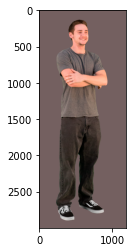

In [17]:
# Создаем массив RGB, выводим первоначальное изображение
RGB_TEST = []
for i in pixelsTEST:
    RGB_TEST.append((i[0], i[1], i[2]))
# len(RGB_TEST)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
array = np.array(RGB_TEST).reshape(height, width, 3)
plt.imshow(array.astype(np.uint8))

In [18]:
# Заполняем датафрейм RGB
points_new_RGB = pd.DataFrame(data=RGB_TEST, columns=['R', 'G', 'B'])
predict_TEST_RGB = gnb_RGB.predict(points_new_RGB)
points_new_RGB = points_new_RGB.assign(label=predict_TEST_RGB)
df_TEST_NEW_RGB = pd.DataFrame(data=points_new_RGB)
# print(points_new_RGB[column].value_counts())

In [19]:
columns = df_TEST_NEW_RGB.columns
print(columns)
for column in columns:
    print(column)
    print(df_TEST_NEW_RGB[column].value_counts(dropna=False))

Index(['R', 'G', 'B', 'label'], dtype='object')
R
116    2368026
255      80486
50       16173
62       16120
55       15461
        ...   
172        378
178        361
164        311
168        300
166        288
Name: R, Length: 256, dtype: int64
G
96     2371277
46       18470
48       18446
45       18352
49       18108
        ...   
23           5
32           3
13           3
232          3
168          1
Name: G, Length: 223, dtype: int64
B
96     2372768
42       18424
43       18158
37       16397
46       16061
        ...   
230         21
232         20
228         14
231         12
233          1
Name: B, Length: 234, dtype: int64
label
0    3416220
1     183780
Name: label, dtype: int64


In [20]:
RGB = []
for it, i in enumerate(RGB_TEST):
    i = list(i)
    i.append(predict_TEST_RGB[it])
    RGB.append(i)
RGB_2 = []
for it, i in enumerate(RGB):
    if (predict_TEST_RGB[it]==1):
        i[0] = 255
        i[1] = 0
        i[2] = 0
    RGB_2.append((i[0], i[1], i[2]))

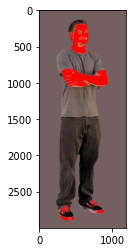

In [21]:
array = np.array(RGB_2).reshape(height, width, 3)
plt.imshow(array.astype(np.uint8))

In [22]:
# Преобразуем из RGB в HSV
HSV_TEST = []
for i in pixelsTEST:
        HSV_TEST.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))

In [23]:
# np.reshape(HSV_TEST,(len(HSV_TEST), 4))
points_new = pd.DataFrame(data=HSV_TEST, columns=['H', 'S', 'V'])
# del points_new['Z']
predidict_TEST = gnb_HSV.predict(points_new)
points_new = points_new.assign(label=predidict_TEST)
df_TEST_NEW = pd.DataFrame(data=points_new)

In [24]:
columns = df_TEST_NEW.columns
print(columns)
for column in columns:
    print(column)
    print(df_TEST_NEW[column].value_counts(dropna=False))

Index(['H', 'S', 'V', 'label'], dtype='object')
H
0.000000    2419432
0.055556      42971
0.083333      39730
0.166667      39639
0.041667      37142
             ...   
0.477273          1
0.011019          1
0.075439          1
0.084656          1
0.422535          1
Name: H, Length: 4289, dtype: int64
S
0.172414    2361508
0.333333      20094
0.250000      15811
0.000000      15208
0.200000      12552
             ...   
0.827160          1
0.406897          1
0.612403          1
0.688679          1
0.585470          1
Name: S, Length: 10346, dtype: int64
V
116    2368013
255      80486
50       16221
62       16162
54       15289
        ...   
170        382
178        336
164        316
168        286
166        277
Name: V, Length: 256, dtype: int64
label
0    3426659
1     173341
Name: label, dtype: int64


In [25]:
HSV_2 =[]
for it, i in enumerate(HSV_TEST):
    i = list(i)
    i.append(predidict_TEST[it])
    HSV_2.append(i)
RGB_3 = []
for it, i in enumerate(HSV_2):
    if (predidict_TEST[it]==1):
        i[0] = 0
        i[1] = 1
        i[2] = 100
    RGB_3.append(colorsys.hsv_to_rgb(i[0], i[1], i[2]))

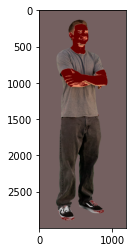

In [26]:
array = np.array(RGB_3).reshape(height, width, 3)
plt.imshow(array.astype(np.uint8))